In [18]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'C:\\Users\\aikat\\Project1_06Dec2025'

In [3]:
df = pd.read_csv("C:\\Users\\Manos\\Downloads.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   OrderID        100000 non-null  object 
 1   OrderDate      100000 non-null  object 
 2   CustomerID     100000 non-null  object 
 3   CustomerName   100000 non-null  object 
 4   ProductID      100000 non-null  object 
 5   ProductName    100000 non-null  object 
 6   Category       100000 non-null  object 
 7   Brand          100000 non-null  object 
 8   Quantity       100000 non-null  int64  
 9   UnitPrice      100000 non-null  float64
 10  Discount       100000 non-null  float64
 11  Tax            100000 non-null  float64
 12  ShippingCost   100000 non-null  float64
 13  TotalAmount    100000 non-null  float64
 14  PaymentMethod  100000 non-null  object 
 15  OrderStatus    100000 non-null  object 
 16  City           100000 non-null  object 
 17  State          100000 non-null

In [5]:
df.shape

(100000, 20)

In [6]:
df.describe()

,Quantity,UnitPrice,Discount,Tax,ShippingCost,TotalAmount
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,3.001400,302.905748,0.074226,68.468902,7.406660,918.256479
std,1.413548,171.840797,0.082583,74.131180,4.324057,724.508332
min,1.000000,5.000000,0.000000,0.000000,0.000000,4.270000
25%,2.000000,154.190000,0.000000,15.920000,3.680000,340.890000
50%,3.000000,303.070000,0.050000,45.250000,7.300000,714.315000
75%,4.000000,451.500000,0.100000,96.060000,11.150000,1349.765000
max,5.000000,599.990000,0.300000,538.460000,15.000000,3534.980000


In [7]:
df.head()

,OrderID,OrderDate,CustomerID,CustomerName,ProductID,ProductName,Category,Brand,Quantity,UnitPrice,Discount,Tax,ShippingCost,TotalAmount,PaymentMethod,OrderStatus,City,State,Country,SellerID
0,ORD0000001,2023-01-31,CUST001504,Vihaan Sharma,P00014,Drone Mini,Books,BrightLux,3,106.59,0.00,0.00,0.09,319.86,Debit Card,Delivered,Washington,DC,India,SELL01967
1,ORD0000002,2023-12-30,CUST000178,Pooja Kumar,P00040,Microphone,Home & Kitchen,UrbanStyle,1,251.37,0.05,19.10,1.74,259.64,Amazon Pay,Delivered,Fort Worth,TX,United States,SELL01298
2,ORD0000003,2022-05-10,CUST047516,Sneha Singh,P00044,Power Bank 20000mAh,Clothing,UrbanStyle,3,35.03,0.10,7.57,5.91,108.06,Debit Card,Delivered,Austin,TX,United States,SELL00908
3,ORD0000004,2023-07-18,CUST030059,Vihaan Reddy,P00041,Webcam Full HD,Home & Kitchen,Zenith,5,33.58,0.15,11.42,5.53,159.66,Cash on Delivery,Delivered,Charlotte,NC,India,SELL01164
4,ORD0000005,2023-02-04,CUST048677,Aditya Kapoor,P00029,T-Shirt,Clothing,KiddoFun,2,515.64,0.25,38.67,9.23,821.36,Credit Card,Cancelled,San Antonio,TX,Canada,SELL01411


In [8]:
df['OrderStatus'].value_counts()

Delivered    74628
Shipped      15192
Pending       4103
Returned      3049
Cancelled     3028
Name: OrderStatus, dtype: int64

In [9]:
#Conver Order date to proper type and create 2 more columns for date and month
df['OrderDate']=pd.to_datetime(df['OrderDate'], errors='coerce')
df['year'] = df['OrderDate'].dt.year
df['month'] = df['OrderDate'].dt.month

df['OrderStatus'].unique() ### categories are --> 'Delivered', 'Cancelled', 'Pending', 'Shipped', 'Returned']
#Clean status - kept only delivered  got rid of 'Cancelled', 'Pending', 'Shipped', 'Returned' -- cleare around 25% of the dataset
df = df[df['OrderStatus'] == 'Delivered']

In [10]:
len(df)

74628

In [11]:
orders = (
    df.groupby([
        "OrderID",
        "OrderDate",
        "CustomerID",
        "CustomerName",
        "Country",
        "State",
        "City",
        "PaymentMethod",
        "SellerID"
    ])
    .agg(
        TotalAmount_sum = ("TotalAmount", "sum"),
        ProductID_count = ("ProductID", "count")
    )
    .reset_index()
)

In [12]:
orders.head()

,OrderID,OrderDate,CustomerID,CustomerName,Country,State,City,PaymentMethod,SellerID,TotalAmount_sum,ProductID_count
0,ORD0000001,2023-01-31,CUST001504,Vihaan Sharma,India,DC,Washington,Debit Card,SELL01967,319.86,1
1,ORD0000002,2023-12-30,CUST000178,Pooja Kumar,United States,TX,Fort Worth,Amazon Pay,SELL01298,259.64,1
2,ORD0000003,2022-05-10,CUST047516,Sneha Singh,United States,TX,Austin,Debit Card,SELL00908,108.06,1
3,ORD0000004,2023-07-18,CUST030059,Vihaan Reddy,India,NC,Charlotte,Cash on Delivery,SELL01164,159.66,1
4,ORD0000006,2022-12-31,CUST042705,Karan Sharma,United States,CA,Los Angeles,UPI,SELL01494,2017.53,1


In [13]:
orders['ProductID_count'].value_counts()

1    74628
Name: ProductID_count, dtype: int64

In [14]:
df.groupby('OrderID')['ProductID'].count()

OrderID
ORD0000001    1
ORD0000002    1
ORD0000003    1
ORD0000004    1
ORD0000006    1
             ..
ORD0099996    1
ORD0099997    1
ORD0099998    1
ORD0099999    1
ORD0100000    1
Name: ProductID, Length: 74628, dtype: int64

In [ ]:
orders.to_csv(""C:\\Users\\aikat\\Project1_06Dec2025\\orders.csv", index=False)

In [37]:
#df.sort_values(['CustomerID','OrderDate']).head(40)

In [16]:
table1 = df.groupby('Country').agg(
        TTL_Amount = ("TotalAmount", "sum"),
        Num_Products = ("ProductID", "count")
    ).sort_values(by='TTL_Amount',ascending=False)

table1

,TTL_Amount,Num_Products
Country,,
United States,47935105.93,52265
India,10383463.02,11310
Canada,3924934.67,4306
United Kingdom,3316230.45,3654
Australia,2812943.03,3093


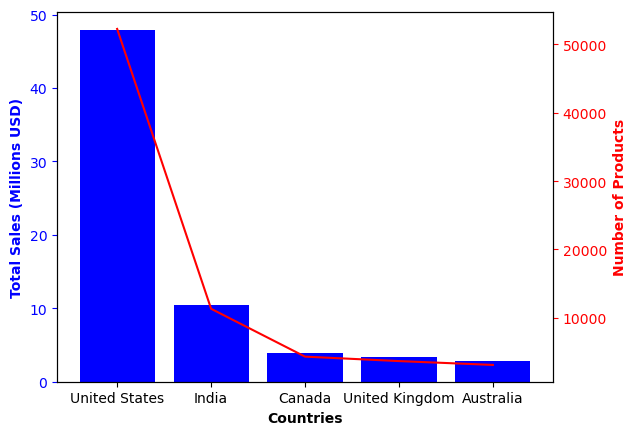

In [44]:
fig, ax = plt.subplots()

ax.bar(table1.index, table1['TTL_Amount'] / 1e6, color='blue')
ax.set_xlabel("Countries",fontweight='bold')
ax.set_ylabel("Total Sales (Millions USD)", color='blue', fontweight='bold')
ax.tick_params("y", colors='blue')

ax2 = ax.twinx()
ax2.plot(table1.index, table1['Num_Products'], color='red')
ax2.set_ylabel("Number of Products", color='red', fontweight='bold')
ax2.tick_params("y", colors='red')

plt.show()

In [46]:
fig.savefig('table1.png',bbox_inches='tight', dpi=100)

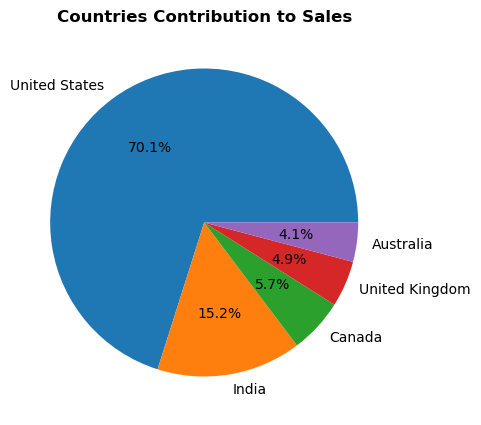

In [29]:
fig,ax=plt.subplots(figsize=(5,5))
ax.set_title("Countries Contribution to Sales", fontweight='bold')
ax.pie(table1['TTL_Amount'], labels=table1.index,  autopct='%1.1f%%')
plt.show() 
fig.savefig('country_sales_piechart.png', bbox_inches='tight', dpi=100)

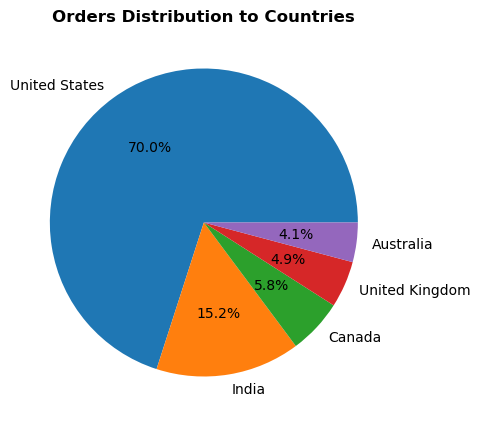

In [28]:
fig1,ax=plt.subplots(figsize=(5,5))
ax.set_title("Orders Distribution to Countries", fontweight='bold')
ax.pie(table1['Num_Products'], labels=table1.index,  autopct='%1.1f%%')
plt.show() 
fig1.savefig('country_orders_piechart.png', bbox_inches='tight', dpi=100)

In [32]:
state_dictionary = {'TX':'Texas',
'CA':'California',
'NC':'North Carolina',
'PA':'Pennsylvania',
'FL':'Florida',
'WA':'Washington',
'IL':'Illinois',
'CO':'Colorado',
'NY':'New York',
'AZ':'Arizona',
'IN':'Indiana',
'OH':'Ohio',
'DC':'Washington DC'
}

In [33]:
df['State_new'] = df['State'].map(state_dictionary)

In [34]:
df.head()

,OrderID,OrderDate,CustomerID,CustomerName,ProductID,ProductName,Category,Brand,Quantity,UnitPrice,...,TotalAmount,PaymentMethod,OrderStatus,City,State,Country,SellerID,year,month,State_new
0,ORD0000001,2023-01-31,CUST001504,Vihaan Sharma,P00014,Drone Mini,Books,BrightLux,3,106.59,...,319.86,Debit Card,Delivered,Washington,DC,India,SELL01967,2023,1,Washington DC
1,ORD0000002,2023-12-30,CUST000178,Pooja Kumar,P00040,Microphone,Home & Kitchen,UrbanStyle,1,251.37,...,259.64,Amazon Pay,Delivered,Fort Worth,TX,United States,SELL01298,2023,12,Texas
2,ORD0000003,2022-05-10,CUST047516,Sneha Singh,P00044,Power Bank 20000mAh,Clothing,UrbanStyle,3,35.03,...,108.06,Debit Card,Delivered,Austin,TX,United States,SELL00908,2022,5,Texas
3,ORD0000004,2023-07-18,CUST030059,Vihaan Reddy,P00041,Webcam Full HD,Home & Kitchen,Zenith,5,33.58,...,159.66,Cash on Delivery,Delivered,Charlotte,NC,India,SELL01164,2023,7,North Carolina
5,ORD0000006,2022-12-31,CUST042705,Karan Sharma,P00023,Cookware Set,Books,ReadMore,4,449.73,...,2017.53,UPI,Delivered,Los Angeles,CA,United States,SELL01494,2022,12,California


In [35]:
USA_states = df[df['Country']=='United States'].groupby('State_new').agg(
        TTL_Amount = ("TotalAmount", "sum"),
        Num_Products = ("ProductID", "count")
    ).sort_values('TTL_Amount',ascending=False)

In [36]:
USA_states

,TTL_Amount,Num_Products
State_new,,
Texas,11925125.12,12981
California,9498660.37,10414
North Carolina,2513192.14,2725
Pennsylvania,2460878.07,2653
Florida,2444255.84,2692
Washington,2412487.60,2618
Illinois,2407529.68,2592
Colorado,2393305.10,2577
New York,2390194.87,2605


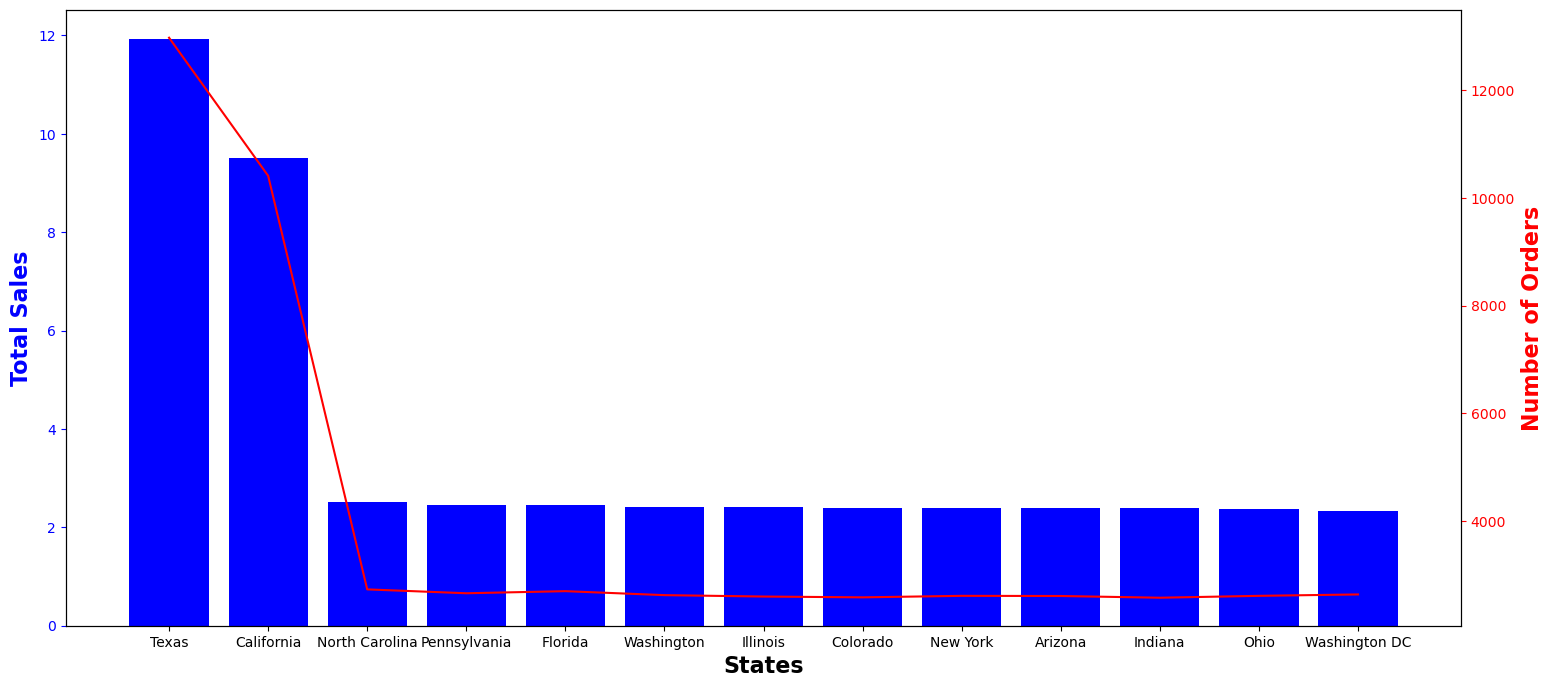

In [70]:
fig2,ax=plt.subplots(figsize=(18,8))
ax.bar(USA_states.index,USA_states['TTL_Amount']/ 1e6, color='blue')
ax.set_xlabel("States",fontweight='bold',fontsize=16)
ax.set_ylabel("Total Sales",color='blue',fontweight='bold',fontsize=16)
ax.tick_params("y",colors='blue')
ax2=ax.twinx()
ax2.plot(USA_states.index,USA_states['Num_Products'],color='red')
ax2.set_ylabel("Number of Orders",color='red',fontweight='bold',fontsize=16)
ax2.tick_params("y",colors='red')
plt.show()

fig2.savefig('State_orders.png', bbox_inches='tight', dpi=100)

In [50]:
categories = df.groupby('Category').agg(
        TTL_Amount = ("TotalAmount", "sum"),
        Num_Orders = ("OrderID", "count")
    ).sort_values(by='TTL_Amount',ascending=False)

In [92]:
categories

,TTL_Amount,Num_Orders
Category,,
Electronics,11661931.08,12618
Sports & Outdoors,11492563.91,12568
Books,11369625.12,12536
Clothing,11339890.29,12296
Toys & Games,11261919.15,12280
Home & Kitchen,11246747.55,12330


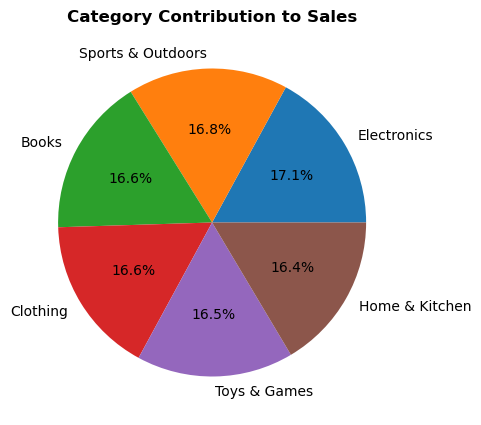

In [52]:
fig3,ax=plt.subplots(figsize=(5,5))
ax.set_title("Category Contribution to Sales",fontweight='bold')
ax.pie(categories['TTL_Amount'], labels=categories.index,  autopct='%1.1f%%')
plt.show() 
fig3.savefig('Category_sales_piechart.png',bbox_inches='tight', dpi=100)

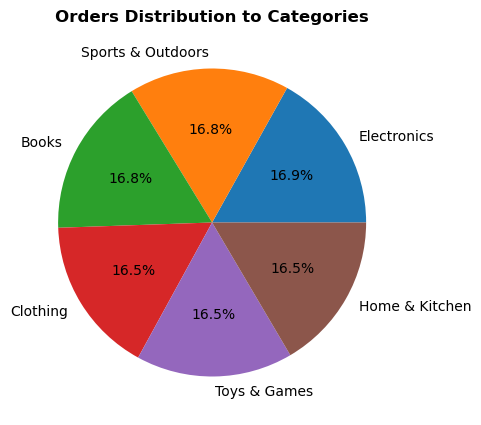

In [53]:
fig4,ax=plt.subplots(figsize=(5,5))
ax.set_title("Orders Distribution to Categories",fontweight='bold')
ax.pie(categories['Num_Orders'], labels=categories.index,  autopct='%1.1f%%')
plt.show() 
fig4.savefig('Category_orders.png',bbox_inches='tight', dpi=100)

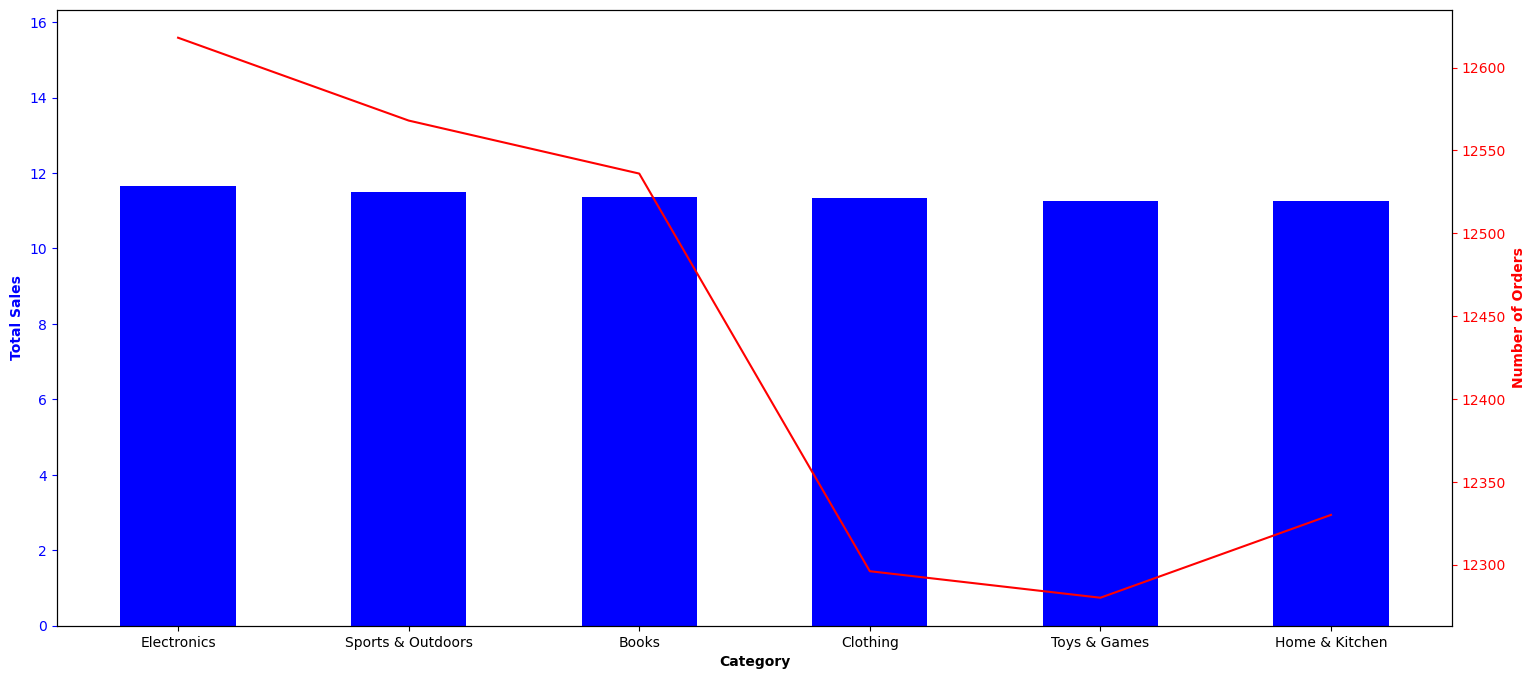

In [59]:
fig5,ax=plt.subplots(figsize=(18,8))
ax.bar(categories.index,categories['TTL_Amount']/ 1e6,color='blue',width=0.5)
ax.set_xlabel("Category",fontweight='bold')
ax.set_ylabel("Total Sales",color='blue',fontweight='bold')
ax.set_ylim(0, (categories['TTL_Amount'] / 1e6).max() * 1.4)
ax.tick_params("y",colors='blue')
ax2=ax.twinx()
ax2.plot(categories.index,categories['Num_Orders'],color='red')
ax2.set_ylabel("Number of Orders",color='red',fontweight='bold')
ax2.tick_params("y",colors='red')
plt.show()

fig5.savefig('Category_sales_orders.png',bbox_inches='tight', dpi=100)

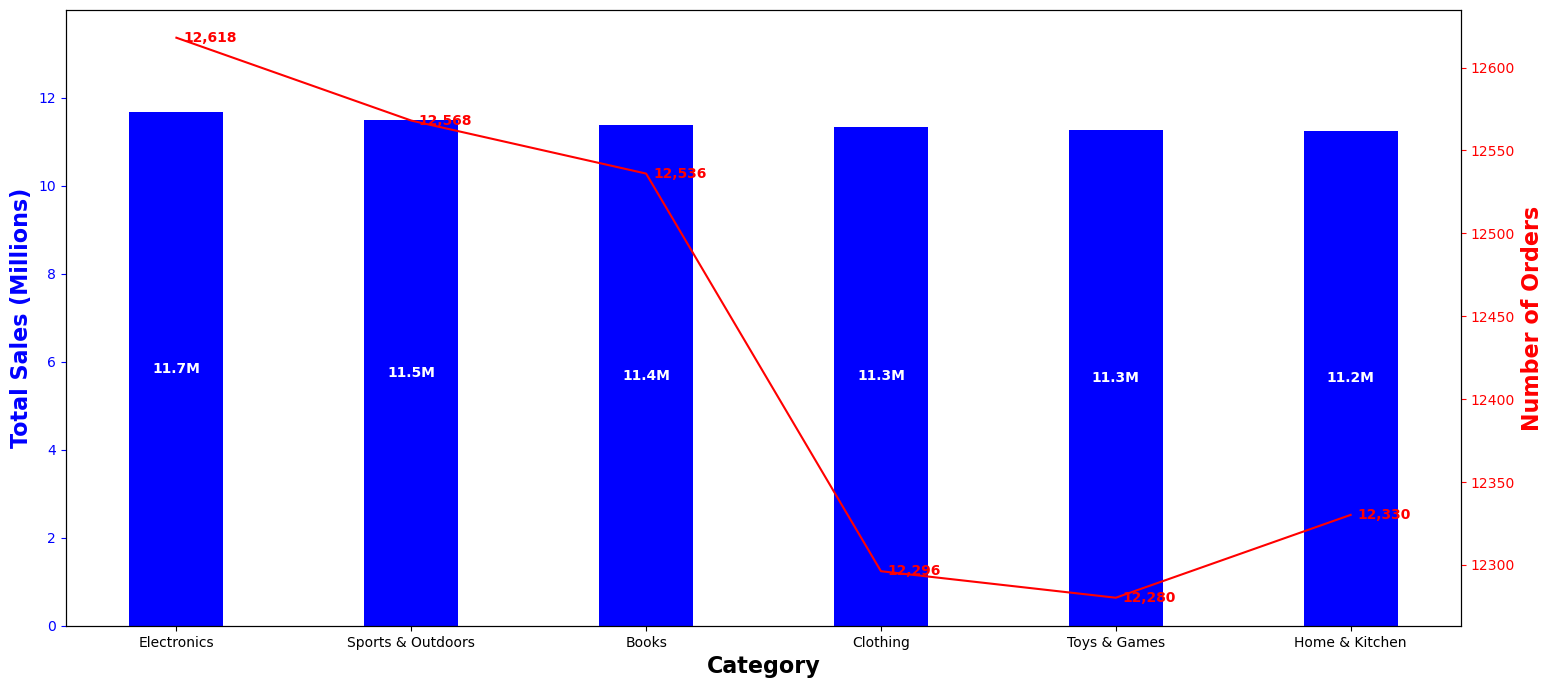

In [67]:
fig5, ax = plt.subplots(figsize=(18,8))

# Create bars and store them in "bars"
bars = ax.bar(
    categories.index,
    categories['TTL_Amount'] / 1e6,
    color='blue',
    width=0.4
)

ax.set_xlabel("Category", fontweight='bold',fontsize=16)
ax.set_ylabel("Total Sales (Millions)", color='blue', fontweight='bold',fontsize=16)
ax.tick_params("y", colors='blue')

# Adjust Y-axis limit
ax.set_ylim(0, (categories['TTL_Amount'] / 1e6).max() * 1.2)

# --- Add labels inside bars ---
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,   # X position (middle of bar)
        height / 2,                          # Y position (middle vertically)
        f"{height:.1f}M",                    # Text label
        ha='center', va='center', color='white', fontweight='bold'
    )

# Secondary axis
ax2 = ax.twinx()
ax2.plot(categories.index, categories['Num_Orders'], color='red')
ax2.set_ylabel("Number of Orders", color='red', fontweight='bold',fontsize=16)
ax2.tick_params("y", colors='red')

# --- Add labels NEXT TO each red point ---
for x, y in zip(categories.index, categories['Num_Orders']):
    ax2.annotate(
        f"{y:,}",
        xy=(x, y),                 # point location
        xytext=(5, 0),             # shift 5 pixels to the right
        textcoords="offset points",
        ha='left',
        va='center',
        color='red',
        fontweight='bold'
    )

plt.show()

fig5.savefig('Category_sales_orders.png', bbox_inches='tight', dpi=100)




In [105]:
df.groupby(['Country','Category']).agg(
     sum_of_sales=('TotalAmount', 'sum'),
     Count_of_orders=('OrderID', 'count')
).sort_values(by='sum_of_sales',ascending=False)

sum_of_sales  Count_of_orders
Country        Category                                        
United States  Electronics          8152549.87             8788
               Sports & Outdoors    8040960.13             8761
               Home & Kitchen       7938254.15             8664
               Clothing             7937903.41             8594
               Books                7935833.62             8792
               Toys & Games         7929604.75             8666
India          Electronics          1782900.14             1955
               Sports & Outdoors    1779809.27             1949
               Books                1723626.47             1871
               Toys & Games         1721545.50             1838
               Clothing             1696016.12             1879
               Home & Kitchen       1679565.52             1818
Canada         Home & Kitchen        676144.66              752
               Electronics           663330.19              701
               Books                 653576.09              734
               Clothing              647883.22              686
               Sports & Outdoors     646807.09              731
               Toys & Games          637193.42              702
United Kingdom Clothing              579295.45              613
               Electronics           572338.48              640
               Sports & Outdoors     559743.06              614
               Books                 541695.96              590
               Home & Kitchen        534841.29              622
               Toys & Games          528316.21              575
Australia      Books                 514892.98              549
               Electronics           490812.40              534
               Clothing              478792.09              524
               Sports & Outdoors     465244.36              513
               Toys & Games          445259.27              499
               Home & Kitchen        417941.93              474